In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [95]:
IMG_PATH = './images/'
SHOW_IMG = True

images = []
images.append(cv2.imread(IMG_PATH+'cielo.png'))
images.append(cv2.imread(IMG_PATH+'ladrillos1.png'))
images.append(cv2.imread(IMG_PATH+'ladrillos2.png'))
images.append(cv2.imread(IMG_PATH+'oveja1.png'))
images.append(cv2.imread(IMG_PATH+'oveja2.png'))
images.append(cv2.imread(IMG_PATH+'piedras1.png'))
images.append(cv2.imread(IMG_PATH+'piedras2.png'))

images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]


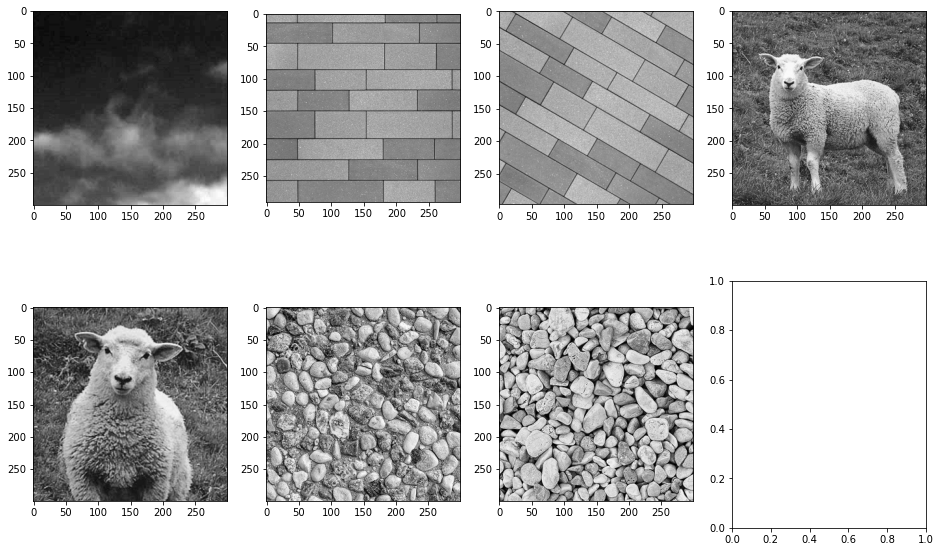

In [96]:
if SHOW_IMG:
    fig, axs = plt.subplots(2, 4,figsize=(16,10))
    for i in range(len(images_gray)):
        plt.subplot(2,4,i+1)
        plt.imshow(images_gray[i], cmap='gray')

## Basic LBP codification

In [66]:
def get_code(array):
    # Return LBP code for a 3x3 matrix
    central_value = array[1,1]
    e = 0
    code = 0
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if i != 1 or j != 1:
                code += int(array[i,j]>=central_value)*(2**e) # Compare value of each pixel and in binary
                e+=1
    return code

In [102]:
images_lbp = []
for img in images_gray:
    new_img = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            section = img[i-1:i+2,j-1:j+2] # Square around pixel (dimension: (3,3))
            new_img[i,j] = get_code(section) # Get lbp code
    new_img = new_img[1:-1,1:-1] # Crop borders
    images_lbp.append(np.array(new_img,dtype=np.int))

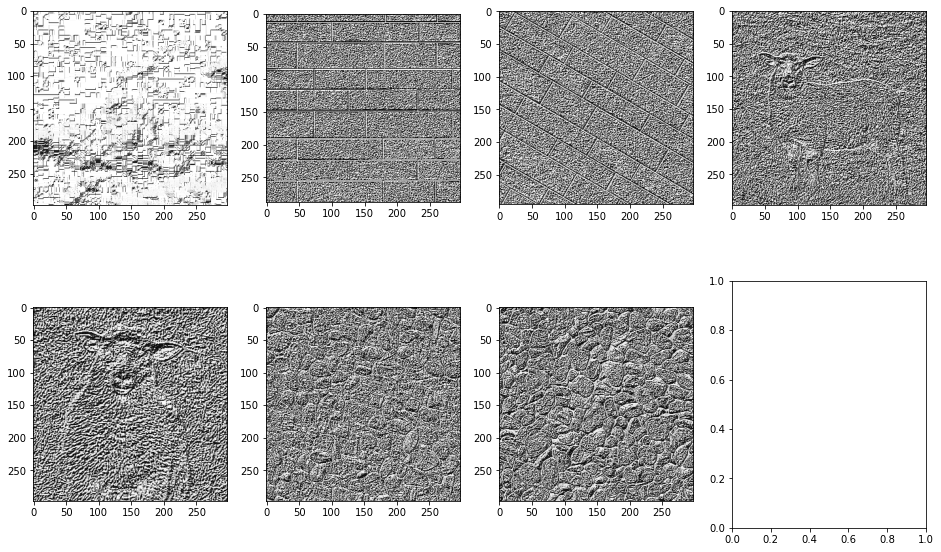

In [97]:
fig, axs = plt.subplots(2, 4,figsize=(16,10))
for i in range(len(images_lbp)):
    plt.subplot(2,4,i+1)
    plt.imshow(images_lbp[i], cmap='gray')

## Compare histogram

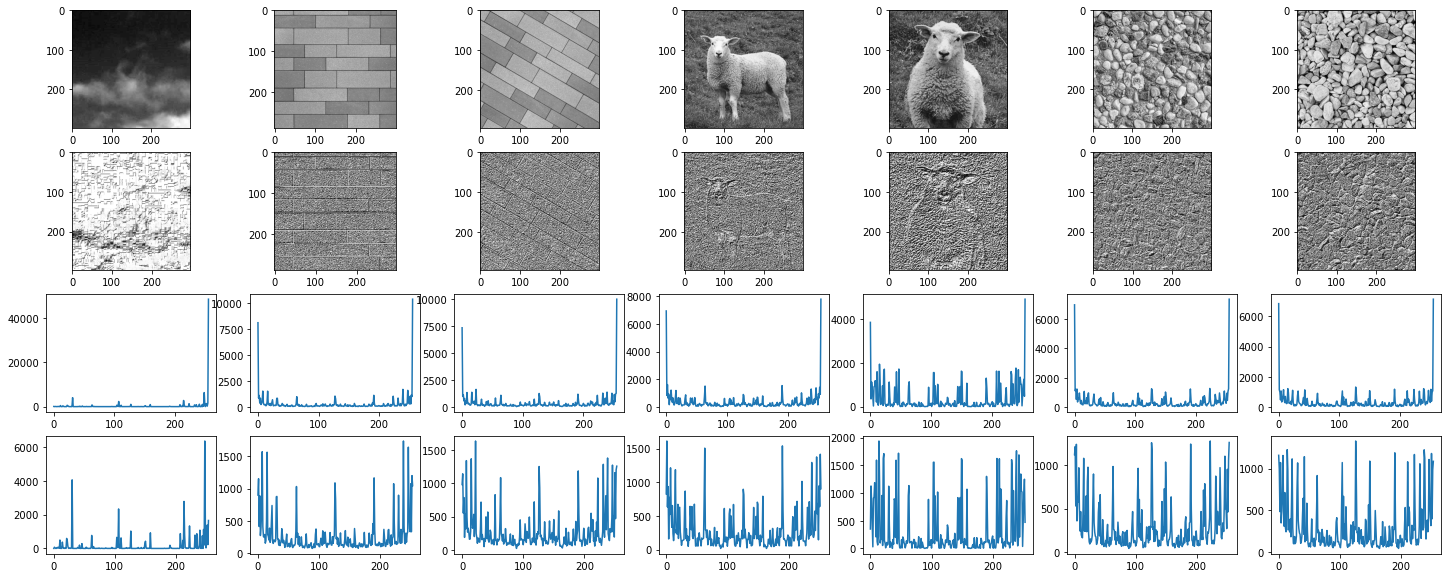

In [125]:
cant_img = len(images_lbp)
fig, axs = plt.subplots(4, cant_img,figsize=(25,10))
for i in range(cant_img):
    # Gray image
    plt.subplot(4,cant_img,i+1)
    plt.imshow(images_gray[i], cmap='gray')
    
    # LBP Code
    plt.subplot(4,cant_img,i+1+cant_img)
    plt.imshow(images_lbp[i], cmap='gray')
    
    # Original histogram
    plt.subplot(4,cant_img,i+1+cant_img*2)
    hist,bins = np.histogram(images_lbp[i].ravel(),bins=256,range=[0,256])
    plt.plot(hist)
    
    # Histogram cutting out extreme values
    plt.subplot(4,cant_img,i+1+cant_img*3)
    plt.plot(hist[1:-1])